In [1]:
using DelimitedFiles, Plots

In [2]:
Plots.default(
#    grid = false,
    size = (400,400),
    fontfamily="serif-roman", 
    titlefontsize =12 ,   
    markerstrokewidth = 1,        # border around dots
#    markersize = 3
)

# 1. epsilon-coupling 

In [3]:
path = "../data_epsilon_coupling/"

"../data_epsilon_coupling/"

### PF00397

In [4]:
L=31

#data obtained with damping 0.9 -> pb of convergence for epsilon larger than 0.5
namefile = path * "run_epsilon_PF00397_sce_100b_betafixed.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_397 = res_epsilon[1,:]
μΔEs_397 = res_epsilon[2,:]./L
σΔEs_397 = res_epsilon[3,:]./L
μdist_397 = res_epsilon[6,:]
σdist_397 = res_epsilon[7,:]
μE_397 = res_epsilon[8,:]./L
σE_397 = res_epsilon[9,:]./L
μU_397 = res_epsilon[10,:]./L
σU_397 = res_epsilon[11,:]./L
μS_397 = res_epsilon[12,:]./L
σS_397 = res_epsilon[13,:]./L
μpolars_397 = res_epsilon[14,:]
σpolars_397 = res_epsilon[15,:];


In [5]:
#data obtained with a smaller damping -> help for convergence
namefile = path * "run_epsilon_PF00397_sce_100b_betafixed_damp0p5.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_397d = res_epsilon[1,:]
μΔEs_397d = res_epsilon[2,:]./L
σΔEs_397d = res_epsilon[3,:]./L
μdist_397d = res_epsilon[6,:]
σdist_397d = res_epsilon[7,:]
μE_397d = res_epsilon[8,:]./L
σE_397d = res_epsilon[9,:]./L
μU_397d = res_epsilon[10,:]./L
σU_397d = res_epsilon[11,:]./L
μS_397d = res_epsilon[12,:]./L
σS_397d = res_epsilon[13,:]./L
μpolars_397d = res_epsilon[14,:]
σpolars_397d = res_epsilon[15,:];


### PF00684

In [6]:
L=67

#data obtained with a smaller damping -> help for convergence
namefile = path * "run_epsilon_PF00684_sce_9_betafixed.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_684 = res_epsilon[1,:]
μΔEs_684 = res_epsilon[2,:]./L
σΔEs_684 = res_epsilon[3,:]./L
μdist_684 = res_epsilon[6,:]
σdist_684 = res_epsilon[7,:]
μE_684 = res_epsilon[8,:]./L
σE_684 = res_epsilon[9,:]./L
μU_684 = res_epsilon[10,:]./L
σU_684 = res_epsilon[11,:]./L
μS_684 = res_epsilon[12,:]./L
σS_684 = res_epsilon[13,:]./L
μpolars_684 = res_epsilon[14,:]
σpolars_684 = res_epsilon[15,:];


In [8]:
pΔ = scatter(-epsilons_397[1:5], μΔEs_397[1:5],  yerr=σΔEs_397[1:5], label="PF00397", legend=:topleft, color="red", markerstrokecolor=:auto)
scatter!(-epsilons_397d, μΔEs_397d,  yerr=σΔEs_397d, legend=:topleft, color="red", label="", markerstrokecolor=:auto)
scatter!(-epsilons_684, μΔEs_684,  yerr=σΔEs_684, legend=:topleft, color="black", label="PF00684")

xlabel!("\$ \\epsilon\$")
ylabel!("\$ \\Delta e_{\\min}\$")
hline!([0.0], label="", color="black")

pdist = scatter(-epsilons_397[1:5], μdist_397[1:5], yerr=σdist_397, label="", legend=:topleft, color="red", markerstrokecolor=:auto)
scatter!(-epsilons_397d, μdist_397d, yerr=σdist_397d, legend=:topleft, color="red", label="", markerstrokecolor=:auto)
scatter!(-epsilons_684, μdist_684, yerr=σdist_684, legend=:topleft, color="black", label="")

hline!([0.0], label="", color="black")
xlabel!("\$ \\epsilon\$")
ylabel!("Hamming distance")

pu = scatter(-epsilons_397[1:5], μE_397[1:5], yerr=σE_397[1:5], label="ground state PF00397", legend=:topleft, color = "red", markerstrokecolor=:auto)
scatter!(-epsilons_397d, μE_397d, yerr=σE_397d, color="red", label="", markerstrokecolor=:auto)
scatter!(-epsilons_684, μE_684, yerr=σE_684, color="black", label="ground state PF00684", markerstrokecolor=:auto)
scatter!(-epsilons_397[1:5], μU_397[1:5], yerr=σU_397[1:5], label="average PF00397", color = "orange", markerstrokecolor=:auto)
scatter!(-epsilons_397d, μU_397d, yerr=σU_397d, color="orange", label="", markerstrokecolor=:auto)
scatter!(-epsilons_684, μU_684, yerr=σU_684, color="gray", label="average PF00684", markerstrokecolor=:auto)

xlabel!("\$ \\epsilon\$")
ylabel!("energy density")
ps = scatter(-epsilons_397[1:5], μS_397[1:5], yerr=σS_397[1:5], legend=:topleft, color = "red", label="", markerstrokecolor=:auto)
scatter!(-epsilons_397d, μS_397d, yerr=σS_397d, color="red", label="", markerstrokecolor=:auto)
scatter!(-epsilons_684, μS_684, yerr=σS_684, color="black", label="")
#scatter!(-epsilons, μpolars, yerr=σpolars, legend=:topleft, color = "black", label="")

xlabel!("\$ \\epsilon\$")
ylabel!("entropy density")
hline!([0.0], label="", color="black", legend=:bottomright);

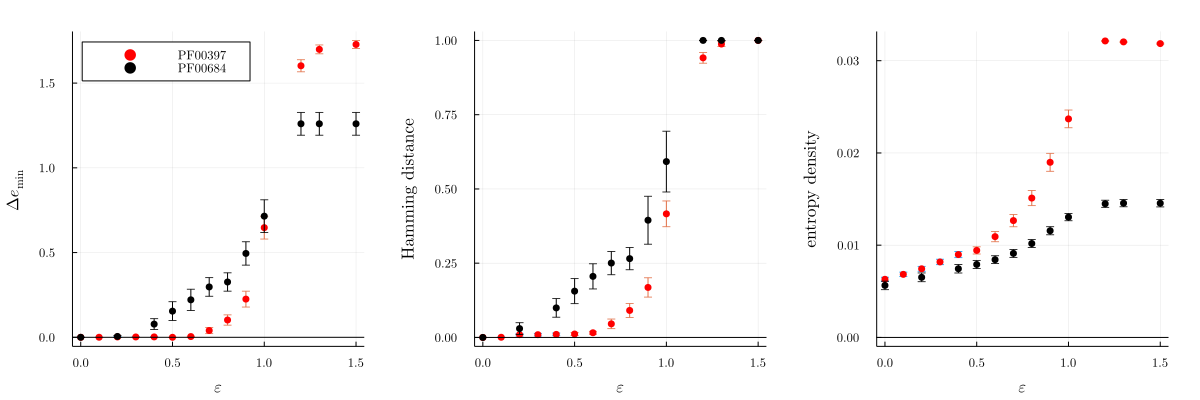

In [9]:
plot(pΔ, pdist, ps, size=(1200,400), layout=(1,3), margin=6*Plots.mm)

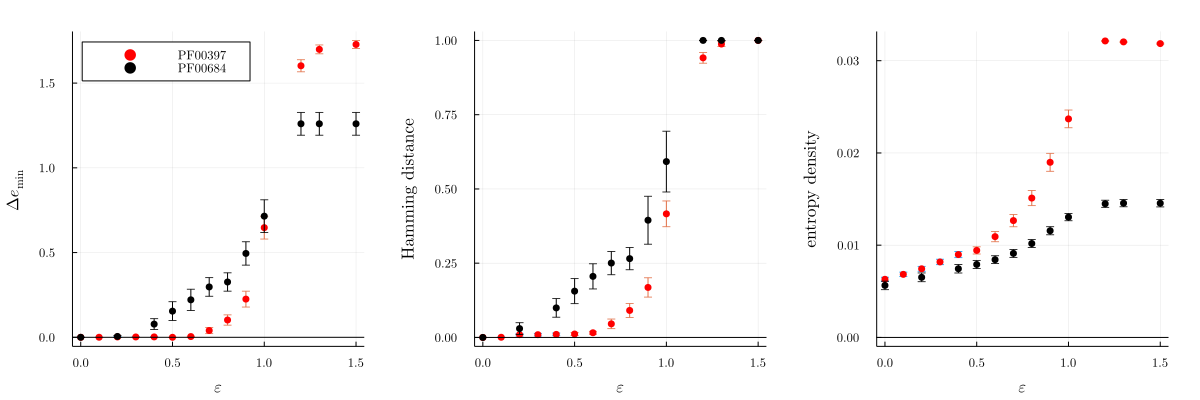

In [10]:
plot(pΔ, pdist, ps, size=(1200,400), layout=(1,3), margin=6*Plots.mm)

In [11]:
savefig("epsilon_coupling.pdf")

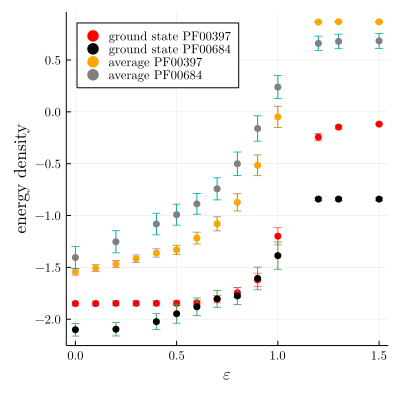

In [12]:
pu

# 2. Sequence-based metrics: comparison between hmmer and SCE:

# 2.1 On PF00397

In [63]:
namefile = "data_compareMSA_PF00397_hmmerSCE.txt"
data_seqs = readdlm(namefile);

L = 31
diffE = data_seqs[1,:]./31;
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];


In [64]:
weights=ones(length(Hdist))/length(Hdist);

p1 = plot(sort(diffE,rev=true), ylabel="e(hmmer)-e(SCE)", xlabel="samples", label="")
p2 = histogram(Hdist, bins = 50, weights = weights, xlabel = "Hamming", label="", ylabel="frequency")
p3 = histogram(Gp, bins = 50, weights = weights, xlabel = "Gap +", label="", ylabel="frequency")
p4 = histogram(Gm, bins = 50, weights = weights, xlabel = "Gap -", label="", ylabel="frequency")
p5 = histogram(Mism, bins = 50, weights = weights, xlabel = "Mismatch", label="", ylabel="frequency");

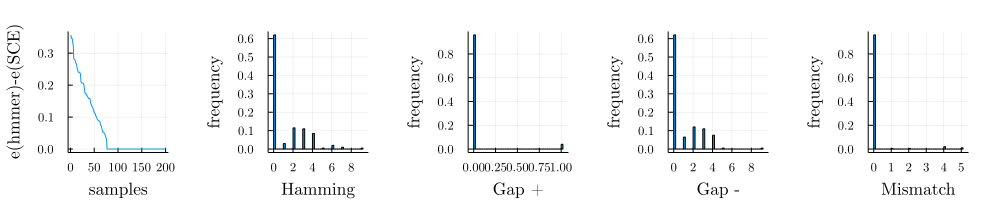

In [65]:
plot(p1, p2, p3, p4, p5, size = (1000, 200), layout = (1,5), margin=6*Plots.mm)

# 2.2 On PF00684

In [73]:
namefile = "data_compareMSA_PF00684_hmmerMF.txt"
data_seqs = readdlm(namefile);

L=67
diffE = data_seqs[1,:]./L;
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

weights=ones(length(Hdist))/length(Hdist);

p6 = plot(sort(diffE,rev=true), ylabel="e(hmmer)-e(MF)", xlabel="samples", label="")
p7 = histogram(Hdist, bins = 50, weights = weights, xlabel = "Hamming", label="", ylabel="frequency")
p8 = histogram(Gp, bins = 50, weights = weights, xlabel = "Gap +", label="", ylabel="frequency")
p9 = histogram(Gm, bins = 50, weights = weights, xlabel = "Gap -", label="", ylabel="frequency")
p10 = histogram(Mism, bins = 50, weights = weights, xlabel = "Mismatch", label="", ylabel="frequency");

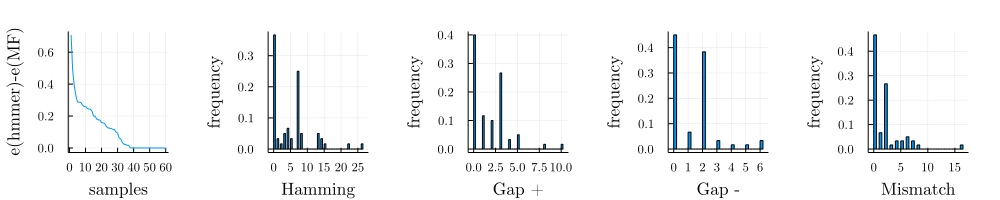

In [74]:
plot(p6, p7, p8, p9, p10, size = (1000, 200), layout = (1,5), margin=6*Plots.mm)

In [80]:
namefile = "data_compareMSA_PF00684_hmmerSCE.txt"
data_seqs = readdlm(namefile);

L=67
diffE = data_seqs[1,:]./L;
Hdist = data_seqs[2,:]
Gp = data_seqs[3,:]
Gm = data_seqs[4,:]
Mism = data_seqs[5,:];

weights=ones(length(Hdist))/length(Hdist);

p6 = plot(sort(diffE,rev=true), ylabel="e(hmmer)-e(SCE)", xlabel="samples", label="")
p7 = histogram(Hdist, bins = 50, weights = weights, xlabel = "Hamming", label="", ylabel="frequency")
p8 = histogram(Gp, bins = 50, weights = weights, xlabel = "Gap +", label="", ylabel="frequency")
p9 = histogram(Gm, bins = 50, weights = weights, xlabel = "Gap -", label="", ylabel="frequency")
p10 = histogram(Mism, bins = 50, weights = weights, xlabel = "Mismatch", label="", ylabel="frequency");

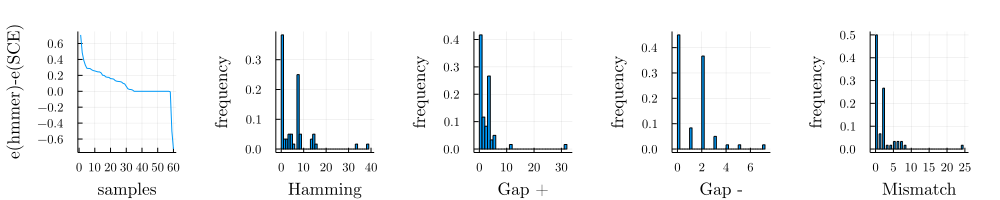

In [81]:
plot(p6, p7, p8, p9, p10, size = (1000, 200), layout = (1,5), margin=6*Plots.mm)

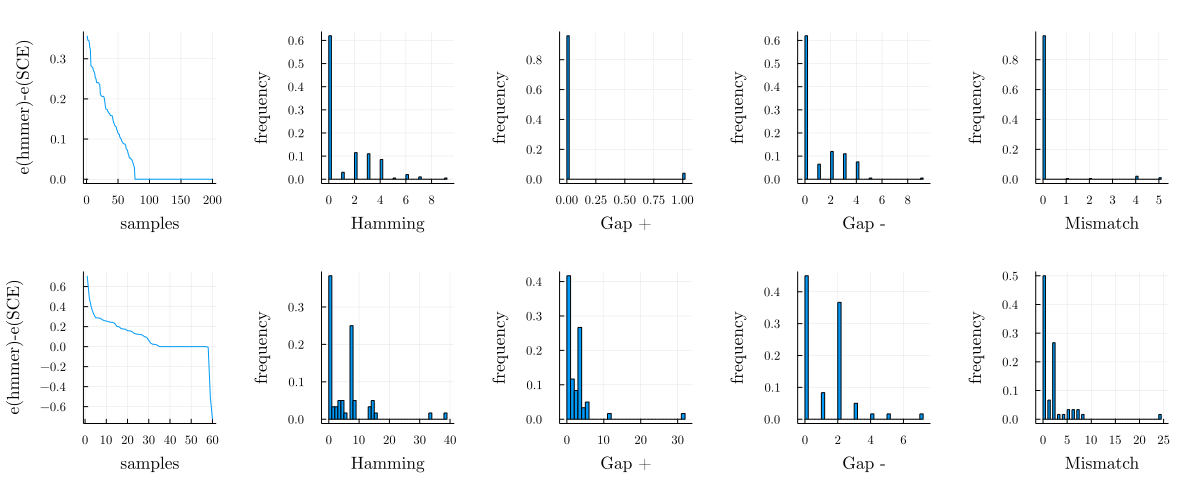

In [96]:
p = plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, size = (1200, 480), layout = (2,5), margin=6*Plots.mm)

In [97]:
savefig("seqs_hmmerSCE.pdf")

# 3. Seq-based metrics: comparison of decoding methods:

In [116]:
namefile = "data_compareMSA_decodings.txt"
data_seqs = readdlm(namefile);

L=31
range=1:200
diffE_PF00397_mf = data_seqs[1,range]./L;
diffE_PF00397_sce = data_seqs[2,range]./L
L=67
range=1:60
diffE_PF00684_mf = data_seqs[3,range]./L
diffE_PF00684_sce = data_seqs[4,range]./L;

p1 = plot(sort(diffE_PF00397_mf,rev=true), title="PF00397 (mf)", label="", xlabel="samples", ylabel="e(nucleation)-e(Viterbi)")
p2 = plot(sort(diffE_PF00397_sce,rev=true), title="PF0397 (sce)", label="", xlabel="samples", ylabel="e(nucleation)-e(Viterbi)")
p3 = plot(sort(diffE_PF00684_mf,rev=true), title="PF00684 (mf)", label="", xlabel="samples", ylabel="e(nucleation)-e(Viterbi)")
p4 = plot(sort(diffE_PF00684_sce,rev=true), title="PF00684 (sce)", label="", xlabel="samples", ylabel="e(nucleation)-e(Viterbi)");


In [117]:
#findmax(diffE_PF00684_sce), findmin(diffE_PF00684_sce)

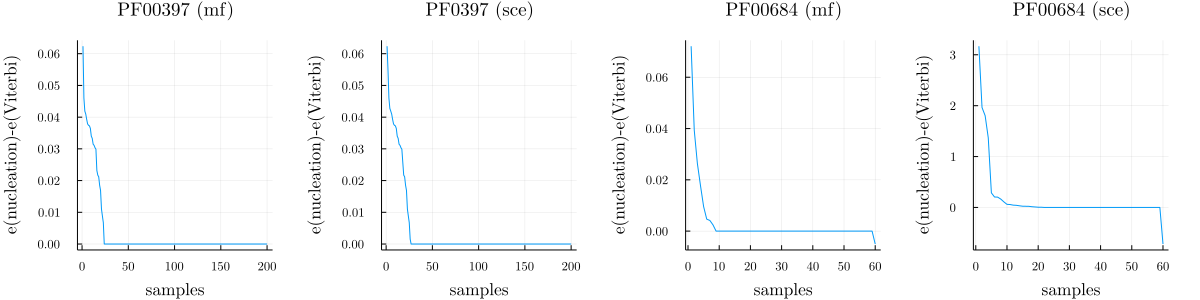

In [123]:
plot(p1, p2, p3, p4, size = (1200, 300), layout = (1,4), margin=6*Plots.mm)

In [124]:
savefig("seqs_decodings.pdf")

# 3. Viterbi Sampling

In [129]:
samps = [23083, 3369, 39260, 6922];

In [219]:
bins = 50
transparency = 0.4
p1 = plot(xlabel="samples", ylabel="e(sampled)-e(ground state)", xticks=[0,1000, 3000, 5000])
p2 = plot(xlabel="Hamming", ylabel="frequency")
p3 = plot(xlabel="Gap +", ylabel="frequency")
p4 = plot(xlabel="Gap -", ylabel="frequency")
p5 = plot(xlabel="Mismatch", ylabel="frequency");
L=31
for i=1:3#length(samps)
    namefile = path * "Viterbi_sampling_"*string(samps[i])*".txt"
    data_vitsamp = readdlm(namefile);

    diffE = data_vitsamp[5,:]./L
    Hdist = data_vitsamp[6,:];
    Gp = data_vitsamp[7,:];
    Gm = data_vitsamp[8,:];
    Mism = data_vitsamp[9,:];
    
    weights=ones(length(Hdist))/length(Hdist);
    
    plot!(p1, sort(diffE,rev=false), label="")
    histogram!(p2, Hdist, bins = bins, weights = weights, label="", seriesalpha=transparency);
    histogram!(p3, Gp, bins = bins, weights = weights, label="", seriesalpha=transparency);
    histogram!(p4, Gm, bins = bins, weights = weights, label="", seriesalpha=transparency);
    histogram!(p5, Mism, bins = bins, weights = weights, label="", seriesalpha=transparency);
end

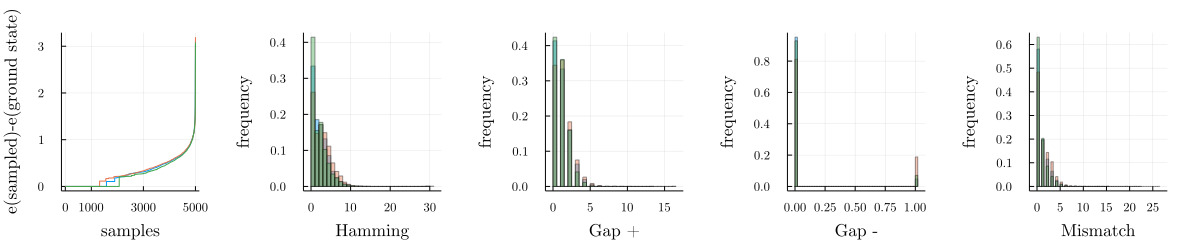

In [220]:
plot(p1, p2, p3, p4, p5, size = (1200, 240), layout = (1,5), margin=6.3*Plots.mm)

In [221]:
savefig("viterbi_sampling.pdf")